In [54]:
# installing yahoo finance library
!pip install yfinance


In [55]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler

In [56]:
# importing libraries
import yfinance as yf

# importing USD-JPY data
usd_jpy_df = yf.download('USDJPY=X', start='1996-10-30', end='2024-08-29')
usd_jpy_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-10-30,114.370003,114.480003,113.610001,114.180000,114.180000,0
1996-11-01,113.500000,113.500000,113.500000,113.500000,113.500000,0
1996-11-04,113.279999,113.980003,112.949997,113.879997,113.879997,0
1996-11-05,113.709999,114.330002,113.449997,114.250000,114.250000,0
1996-11-06,114.230003,114.680000,113.650002,113.949997,113.949997,0


In [57]:
# From here we can see that on average yen value was 111.5, and it was min 75 yen.73 per usd, highest was 161.2
usd_jpy_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7218.000000,7218.000000,7218.000000,7218.000000,7218.000000,7218.0
mean,111.594651,112.050878,111.095597,111.589815,111.589815,0.0
std,16.040874,16.123239,15.955976,16.040775,16.040775,0.0
min,75.750000,75.973999,75.570000,75.739998,75.739998,0.0
25%,104.322500,104.806999,103.900501,104.316002,104.316002,0.0
50%,110.992496,111.407001,110.586502,110.999500,110.999500,0.0
75%,119.856001,120.349998,119.297503,119.848000,119.848000,0.0
max,161.621002,161.942001,161.300003,161.621002,161.621002,0.0


In [58]:
# We can see that there are no null values
usd_jpy_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Historical relationship between Yen/USD')

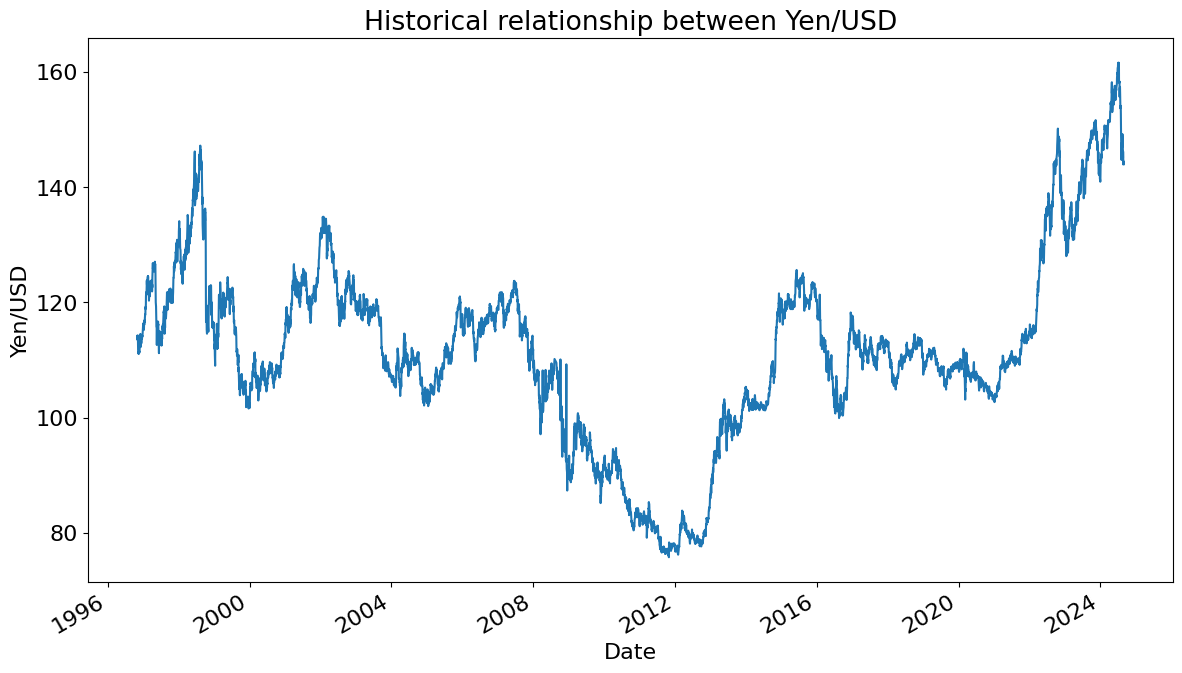

In [59]:
usd_jpy_df['Close'].plot()
plt.ylabel('Yen/USD')
plt.title('Historical relationship between Yen/USD')

In [60]:
usd_jpy_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-10-30,114.370003,114.480003,113.610001,114.180000,114.180000,0
1996-11-01,113.500000,113.500000,113.500000,113.500000,113.500000,0
1996-11-04,113.279999,113.980003,112.949997,113.879997,113.879997,0
1996-11-05,113.709999,114.330002,113.449997,114.250000,114.250000,0
1996-11-06,114.230003,114.680000,113.650002,113.949997,113.949997,0
...,...,...,...,...,...,...
2024-08-22,145.117996,146.470001,144.947998,145.117996,145.117996,0
2024-08-23,146.201996,146.473007,144.604996,146.201996,146.201996,0
2024-08-26,144.000000,144.578995,143.460007,144.000000,144.000000,0


In [61]:
# Our data is not stationary
from statsmodels.tsa.stattools import adfuller

adfuller(usd_jpy_df['Close'])[1]  # p-value

0.5522395324429307

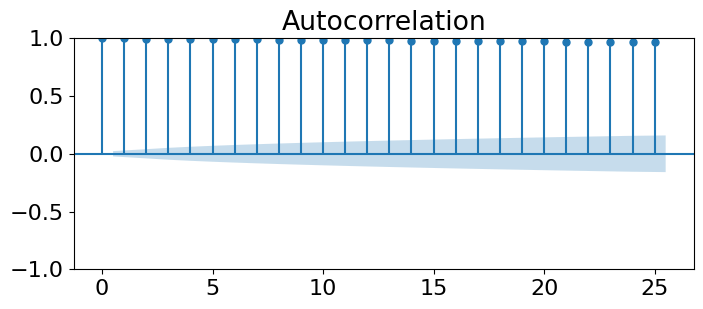

In [62]:
fig, ax = plt.subplots(1,1, figsize=(8,3))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(usd_jpy_df['Close'], lags=25, ax=ax)
plt.show()

In [63]:
usd_jpy_df['Day_of_week'] = usd_jpy_df.index.dayofweek
usd_jpy_df['Month'] = usd_jpy_df.index.month
usd_jpy_df['Year'] = usd_jpy_df.index.year
usd_jpy_df.head()


,Open,High,Low,Close,Adj Close,Volume,Day_of_week,Month,Year
Date,,,,,,,,,
1996-10-30,114.370003,114.480003,113.610001,114.180000,114.180000,0,2,10,1996
1996-11-01,113.500000,113.500000,113.500000,113.500000,113.500000,0,4,11,1996
1996-11-04,113.279999,113.980003,112.949997,113.879997,113.879997,0,0,11,1996
1996-11-05,113.709999,114.330002,113.449997,114.250000,114.250000,0,1,11,1996
1996-11-06,114.230003,114.680000,113.650002,113.949997,113.949997,0,2,11,1996


Text(0, 0.5, 'Yen/USD')

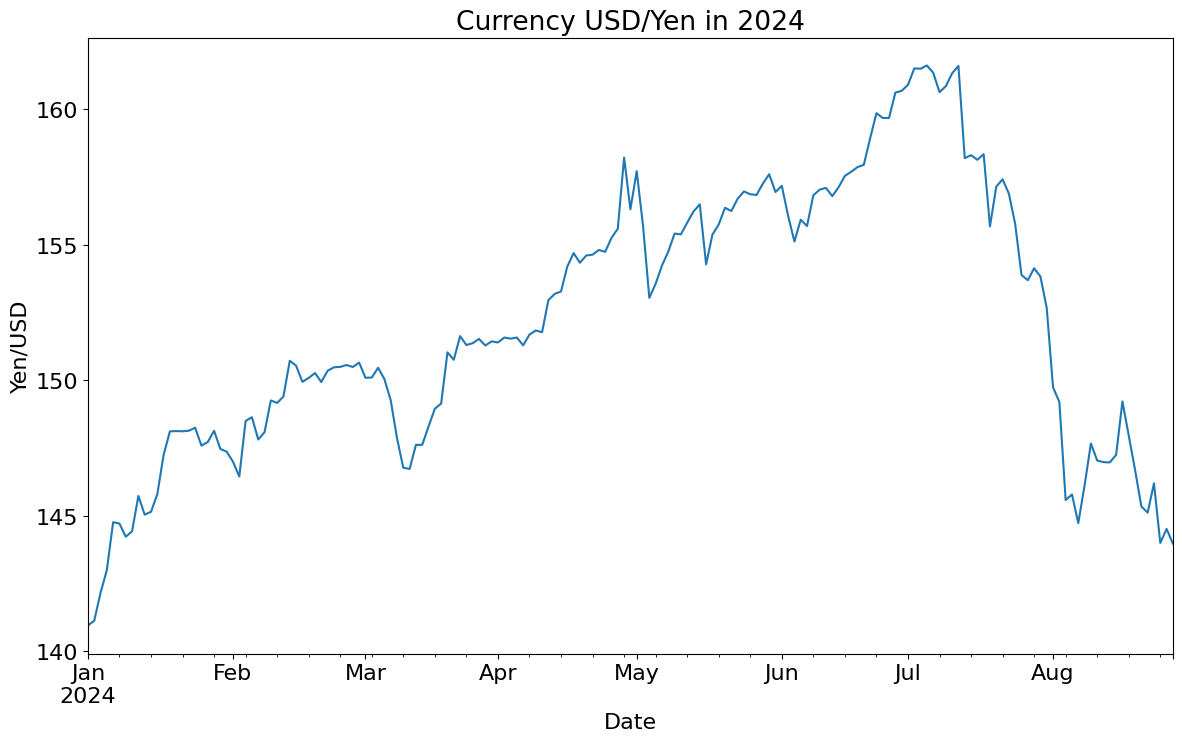

In [64]:
#From here we can see
usd_jpy_df[usd_jpy_df['Year']==2024]['Close'].plot()
plt.title('Currency USD/Yen in 2024')
plt.ylabel('Yen/USD')

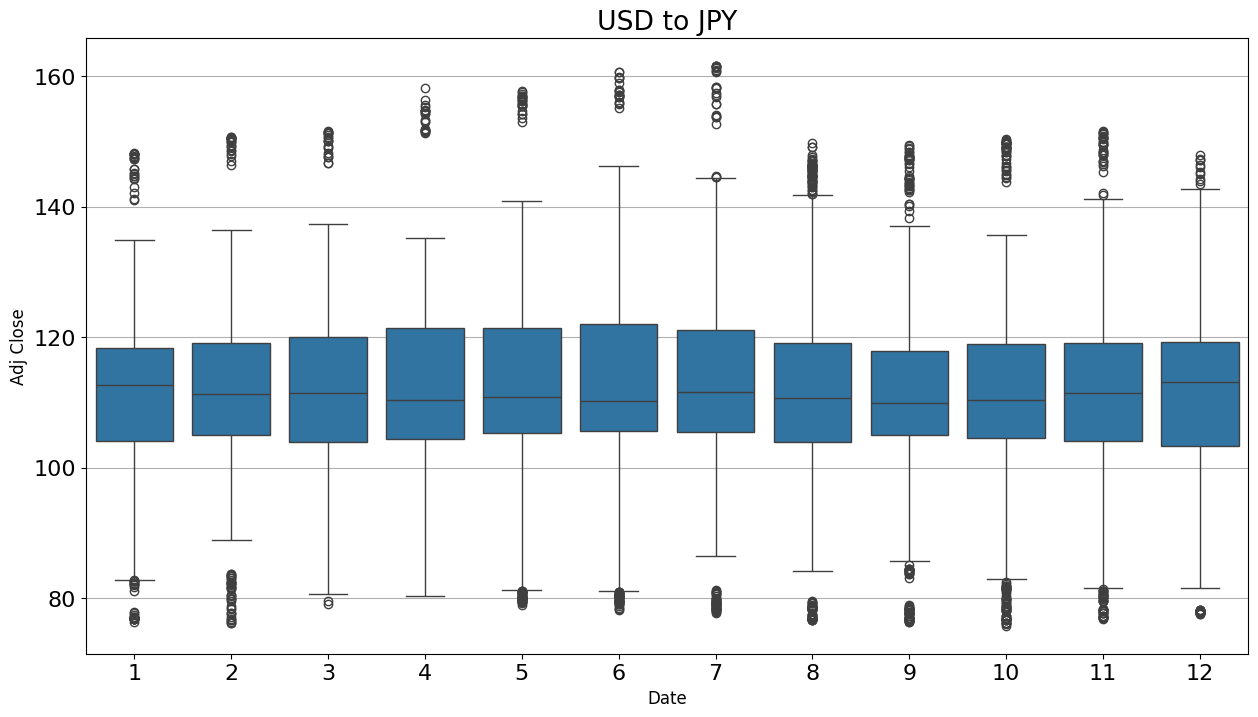

In [65]:
# Plotting Adj Close price against Month
plt.figure(figsize=(15,8))
plt.grid(True)
plt.title('USD to JPY')
sns.boxplot(x=usd_jpy_df['Month'], y=usd_jpy_df['Adj Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.show()

ACF and PACF Plot


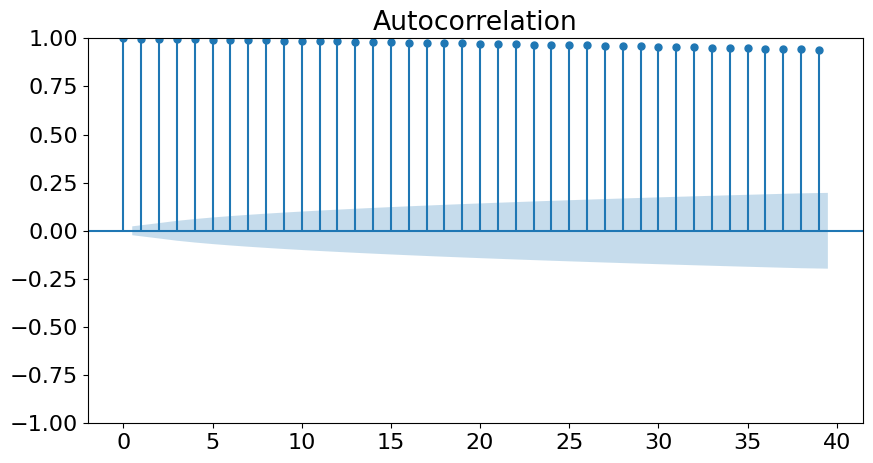

In [66]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(10,5))
plot_acf(usd_jpy_df['Adj Close'])
print()


We can see autocorrelation until 40 lag values

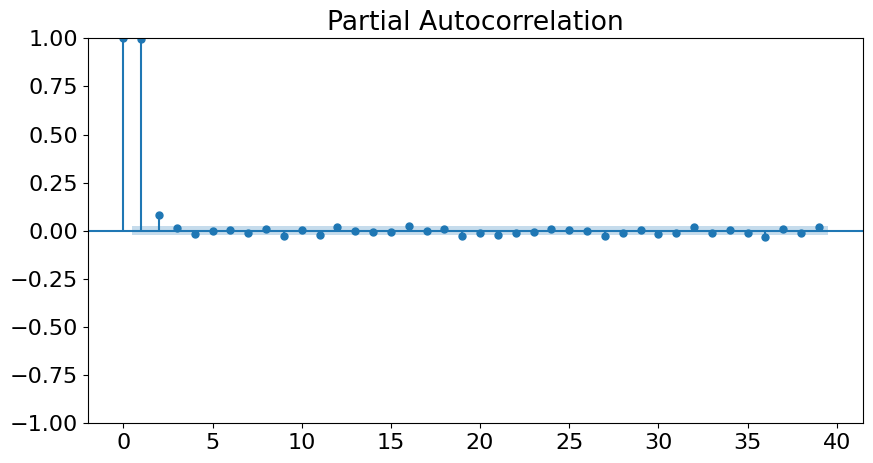

In [67]:
#Partial auto-correlation shows only few lag values are actually correlated.
plt.rc("figure", figsize=(10,5))
plot_pacf(usd_jpy_df['Adj Close'])
print()

📙 4. Price forecasting¶


In [68]:
data = usd_jpy_df['Adj Close'].values
data

array([114.18000031, 113.5       , 113.87999725, ..., 144.        ,
       144.51600647, 143.9750061 ])

In [69]:
data.shape

(7218,)

In [70]:
# Separate train and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Train length:  5774
Shape of Train and Test data:  5774 1444


In [71]:
# split a univariate sequence into supervised learning [Input and Output]
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)-1-n_steps):
        #sequence=10, n_steps=3
        end_ix = i + n_steps
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [72]:
lag = 3  # Empirically we have choosen
n_features = 1

In [73]:
train_X, train_y = split_sequence(train_data, lag)
test_X, test_y = split_sequence(test_data, lag)

In [74]:
train_X

array([[114.18000031, 113.5       , 113.87999725],
       [113.5       , 113.87999725, 114.25      ],
       [113.87999725, 114.25      , 113.94999695],
       ...,
       [109.96099854, 109.94100189, 109.97399902],
       [109.94100189, 109.97399902, 109.7559967 ],
       [109.97399902, 109.7559967 , 109.80999756]])

In [75]:
train_y

array([114.25      , 113.94999695, 111.73999786, ..., 109.7559967 ,
       109.80999756, 110.40000153])

In [76]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (5770, 3) (5770,)
Shape of test_X and test_y:  (1440, 3) (1440,)


In [77]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

In [78]:
# New shape of train_X and test_X are :-
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (5770, 3, 1) (5770,)
Shape of test_X and test_y:  (1440, 3, 1) (1440,)


In [79]:
#4.4 Define Model
'''from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
# define model
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=False, input_shape=(lag, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()'''

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 16)                1152      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [101]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(32, activation='relu'))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 32)                4352      
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,625
Trainable params: 4,625
Non-trainable params: 0
_________________________________________________________________


In [102]:
history = model.fit(train_X, train_y, epochs = 25, batch_size=8, verbose=1, validation_split= 0.1)

Epoch 1/25
650/650 [==============================] - 1s 822us/step - loss: 888.3905 - val_loss: 0.4808
Epoch 2/25
650/650 [==============================] - 0s 640us/step - loss: 1.1504 - val_loss: 0.5299
Epoch 3/25
650/650 [==============================] - 0s 635us/step - loss: 1.1768 - val_loss: 0.5552
Epoch 4/25
650/650 [==============================] - 0s 672us/step - loss: 1.1980 - val_loss: 0.4818
Epoch 5/25
650/650 [==============================] - 0s 636us/step - loss: 1.2372 - val_loss: 0.4971
Epoch 6/25
650/650 [==============================] - 0s 631us/step - loss: 1.2564 - val_loss: 1.0372
Epoch 7/25
650/650 [==============================] - 0s 629us/step - loss: 1.2632 - val_loss: 0.7544
Epoch 8/25
650/650 [==============================] - 0s 630us/step - loss: 1.3328 - val_loss: 0.5916
Epoch 9/25
650/650 [==============================] - 0s 627us/step - loss: 1.2896 - val_loss: 1.0291
Epoch 10/25
650/650 [==============================] - 0s 629us/step - loss: 1.2

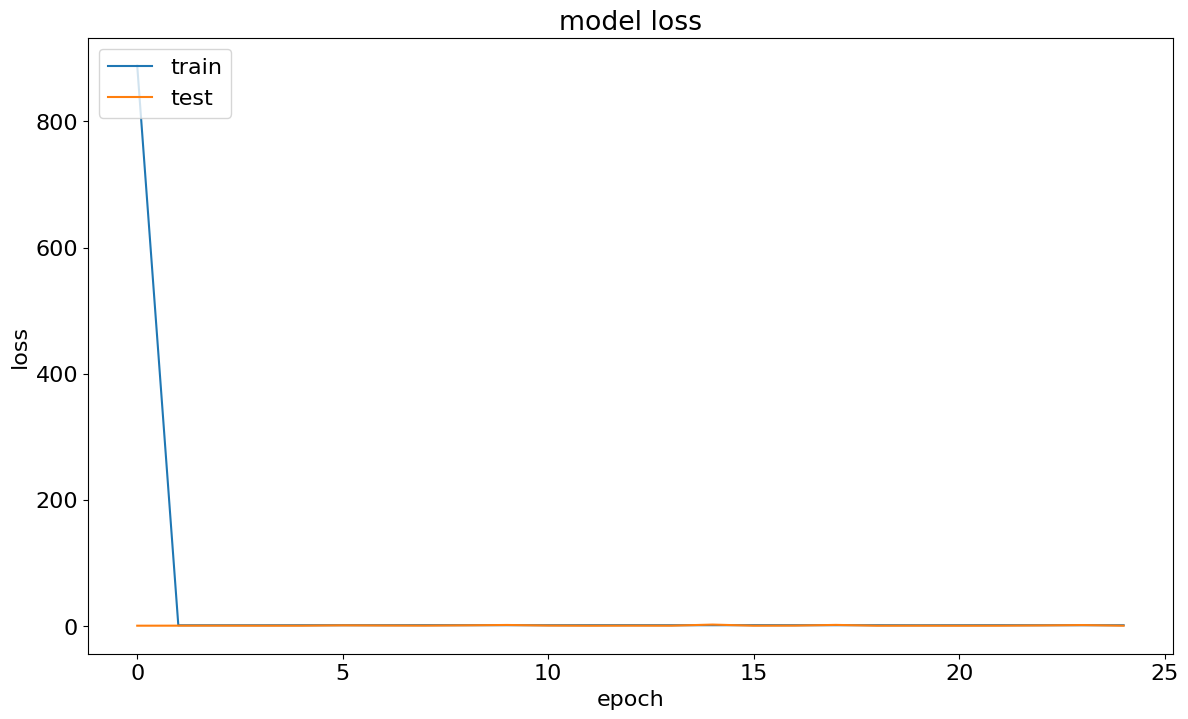

In [103]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [104]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

45/45 [==============================] - 0s 356us/step
Shape of train and test predict:  (5770, 1) (1440, 1)


In [105]:
# root mean squared error or rmse
import math
from sklearn.metrics import mean_squared_error

def measure_rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

train_score = measure_rmse(train_y, train_predict)
test_score = measure_rmse(test_y, test_predict)

print('Train and Test RMSE: ', train_score, test_score)

Train and Test RMSE:  0.9725120139927412 0.934075434432295


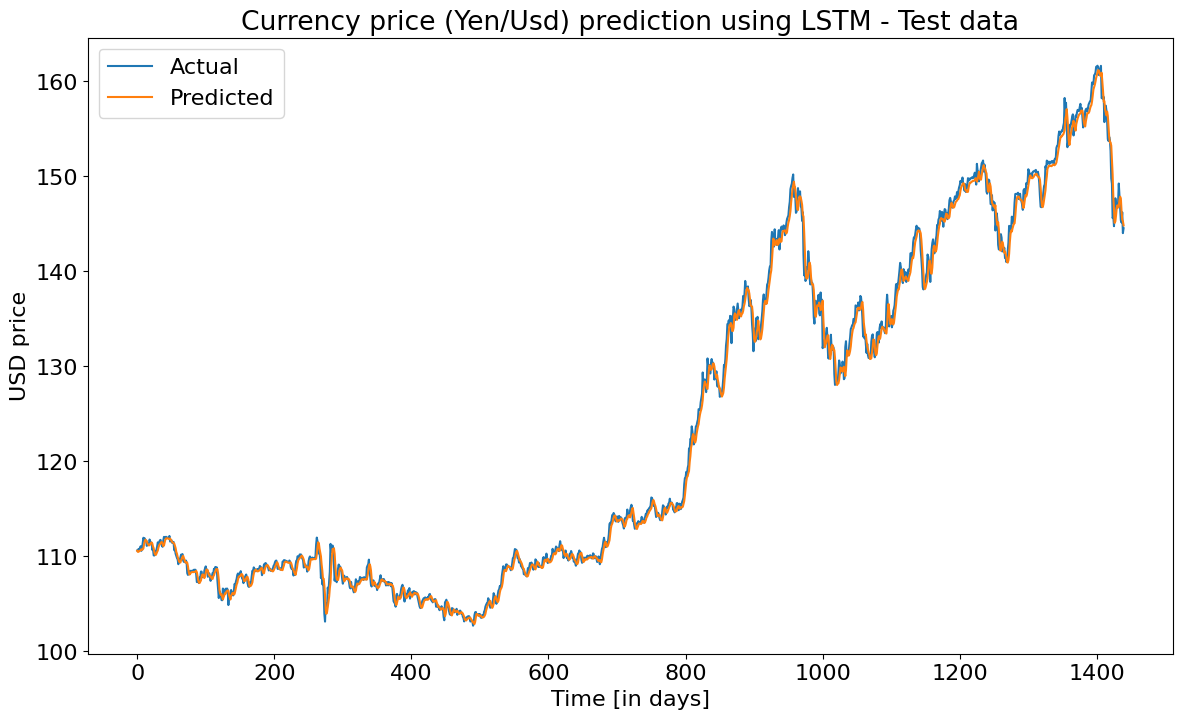

In [106]:
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.plot(test_y, label = 'Actual')
plt.plot(test_predict, label = 'Predicted')
plt.xlabel('Time [in days]')
plt.ylabel('USD price')
plt.title('Currency price (Yen/Usd) prediction using LSTM - Test data')
plt.legend()
plt.show()

In [117]:
import numpy as np

# Assume 'model' is your trained model and 'scaler' is your data scaler

# Get the last sequence of known values
last_sequence = test_X[-1]  # Shape: (sequence_length, num_features)

# Prepare to store predictions
future_predictions = []

# Number of days to predict
num_future_days = 5

for _ in range(num_future_days):
    # Reshape the last sequence for prediction
    input_data = last_sequence.reshape((1, last_sequence.shape[0], last_sequence.shape[1]))

    # Make prediction
    predicted_value = model.predict(input_data)

    # Append prediction to our list
    future_predictions.append(predicted_value[0, 0])

    # Update last_sequence by removing the oldest entry and adding the new prediction
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1] = predicted_value
    print(last_sequence)


1/1 [==============================] - 0s 10ms/step
[[146.20199585]
 [144.        ]
 [144.81489563]]
1/1 [==============================] - 0s 8ms/step
[[144.        ]
 [144.81489563]
 [144.70709229]]
1/1 [==============================] - 0s 8ms/step
[[144.81489563]
 [144.70709229]
 [144.21966553]]
1/1 [==============================] - 0s 9ms/step
[[144.70709229]
 [144.21966553]
 [144.28970337]]
1/1 [==============================] - 0s 8ms/step
[[144.21966553]
 [144.28970337]
 [144.11491394]]


In [116]:
test_X[-1]

array([[145.11799622],
       [146.20199585],
       [144.        ]])

In [112]:
last_sequence.shape[1]

1